# Recommendation of New User Booking On Airbnb

#### License
The text in the document is documented by Ayush Jain, Ramya Sri Gujjari, Shweta Pathak is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document is documented by Ayush Jain, Ramya Sri Gujjari, Shweta Pathak is licensed under the MIT License https://opensource.org/licenses/MIT

#### Citation
As this a Kaggle competition, we have taken the dataset from Kaggle site. The Name of the Competion was "AIRBNB NEW USER BOOKING".

The Columns in the dataset:  
--id: user id
--date_account_created: the date of account creation  
--timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or   date_first_booking because a user can search before signing up  
--date_first_booking: date of first booking  
--gender: Gender of the person.  
--age: Age of the person.  
--signup_method:The portal through which the account was created.  
--signup_flow: the page a user came to signup up from  
--language: international language preference  
--affiliate_channel: what kind of paid marketing  
--affiliate_provider: where the marketing is e.g. google, craigslist, other  
--first_affiliate_tracked: whats the first marketing the user interacted with before the signing up  
--signup_app  
--first_device_type  
--first_browser  
--Destination: this is the "Target" variable you are to predict  

*Importing Packages and Reading DataSets*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
travel_train = pd.read_csv("train_users_2_final.csv")
travel_test = pd.read_csv('test_users_final.csv')

### We have Added Five columns in the dataset which are more specific in predicting the destination of the New Users on AIRBNB. These columns Are Namely:
1. Personality:- It represents the trip which the person would like to go like "DIGITAL DETOX", "SIGHT SEEING", "ADVENTURE".
2. Types_of_trips: It represents the number of people going on the trip like Group, Couple,Solo.
3. Length_Of_the_trip(weeks): It represnts the number of weeks people are planning to go on trip.
4. Budget: The maximum budget people wish to spend for the trip. We have values 1,2..20. 1 is equal to 10000 and 20 represents 200000.
5. PreferredMonthName: The month of the year they want to travel. We have values from 1 to 12 representing the 'MONTH NUMBER'.

### The values in the Destination have also been changed from a Broad category like country to more specific places like washington DC,dubai.This was necessary to add value to the parameters which we have added in the dataset.

In [3]:
travel_train.head()

id date_account_created  timestamp_first_active date_first_booking  \
0  gxn3p5htnn            6/28/2010            2.010000e+13                NaN   
1  820tgsjxq7            5/25/2011            2.010000e+13                NaN   
2  4ft3gnwmtx            9/28/2010            2.010000e+13           8/2/2010   
3  bjjt8pjhuk            12/5/2011            2.010000e+13           9/8/2012   
4  87mebub9p4            9/14/2010            2.010000e+13          2/18/2010   

      gender   age signup_method  signup_flow language affiliate_channel  \
0  -unknown-   NaN      facebook            0       en            direct   
1       MALE  38.0      facebook            0       en               seo   
2     FEMALE  56.0         basic            3       en            direct   
3     FEMALE  42.0      facebook            0       en            direct   
4  -unknown-  41.0         basic            0       en            direct   

          ...         first_affiliate_tracked signup_app first_device_type  \
0         ...                       untracked        Web       Mac Desktop   
1         ...                       untracked        Web       Mac Desktop   
2         ...                       untracked        Web   Windows Desktop   
3         ...                       untracked        Web       Mac Desktop   
4         ...                       untracked        Web       Mac Desktop   

  first_browser    Destination    Personality Types_of_trips  \
0        Chrome            NDF  Digital detox          Group   
1        Chrome            NDF   Sight seeing         Couple   
2            IE  Washington DC      Adventure          Group   
3       Firefox          other      Adventure          Group   
4        Chrome  Washington DC   Sight seeing           Solo   

  Length_of_the_trip(weeks)  Budget  PreferredMonthName  
0                         2      13                   5  
1                         3       4                   5  
2                         2      10                  12  
3                         4       8                   3  
4                         4       4                   7  

[5 rows x 21 columns]

In [4]:
travel_train.shape

(213451, 21)

In [5]:
travel_test.shape

(62096, 21)

# Data Cleaning

Finding missing values

Checking to see if the data is clean

In [6]:
print(travel_train.apply(lambda x:sum(x.isnull()),axis=0))

id                                0
date_account_created              0
timestamp_first_active            0
date_first_booking           124543
gender                            0
age                           87990
signup_method                     0
signup_flow                       0
language                          0
affiliate_channel                 0
affiliate_provider                0
first_affiliate_tracked        6065
signup_app                        0
first_device_type                 0
first_browser                     0
Destination                       0
Personality                       0
Types_of_trips                    0
Length_of_the_trip(weeks)         0
Budget                            0
PreferredMonthName                0
dtype: int64


In [7]:
print(travel_test.apply(lambda x:sum(x.isnull()),axis=0))

id                               0
date_account_created             0
timestamp_first_active           0
date_first_booking           62096
gender                           0
age                          28876
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked         20
signup_app                       0
first_device_type                0
first_browser                    0
Personality                      0
Types_of_trips                   0
Budget                           0
Length_of_the_trip(weeks)        0
PreferredMonthName               0
Origin city                      0
dtype: int64


In [8]:
travel_test.drop(['date_first_booking'], axis=1,inplace=True)

In [9]:
travel_train.isnull().sum()

id                                0
date_account_created              0
timestamp_first_active            0
date_first_booking           124543
gender                            0
age                           87990
signup_method                     0
signup_flow                       0
language                          0
affiliate_channel                 0
affiliate_provider                0
first_affiliate_tracked        6065
signup_app                        0
first_device_type                 0
first_browser                     0
Destination                       0
Personality                       0
Types_of_trips                    0
Length_of_the_trip(weeks)         0
Budget                            0
PreferredMonthName                0
dtype: int64

In [10]:
travel_test.isnull().sum()

id                               0
date_account_created             0
timestamp_first_active           0
gender                           0
age                          28876
signup_method                    0
signup_flow                      0
language                         0
affiliate_channel                0
affiliate_provider               0
first_affiliate_tracked         20
signup_app                       0
first_device_type                0
first_browser                    0
Personality                      0
Types_of_trips                   0
Budget                           0
Length_of_the_trip(weeks)        0
PreferredMonthName               0
Origin city                      0
dtype: int64

In [11]:
#Changing the Gender Values from Unknown to NaN
travel_train.gender.replace('-unknown-', np.nan, inplace=True)
travel_test.gender.replace('-unknown-', np.nan, inplace=True)

In [12]:
#The age has values like 2014 which in not a valid age and it has values lesser than 18 which is the minimum age criteria to signup for Airbnb
travel_train.loc[travel_train.age > 95, 'age'] = np.nan
travel_train.loc[travel_train.age < 18, 'age'] = np.nan

travel_test.loc[travel_test.age > 95, 'age'] = np.nan
travel_test.loc[travel_test.age < 18, 'age'] = np.nan

In [13]:
travel_test.head()

id date_account_created  timestamp_first_active  gender   age  \
0  5uwns89zht             7/1/2014            2.010000e+13  FEMALE  35.0   
1  jtl0dijy2j             7/1/2014            2.010000e+13     NaN   NaN   
2  xx0ulgorjt             7/1/2014            2.010000e+13     NaN   NaN   
3  6c6puo6ix0             7/1/2014            2.010000e+13     NaN   NaN   
4  czqhjk3yfe             7/1/2014            2.010000e+13     NaN   NaN   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
0      facebook            0       en            direct             direct   
1         basic            0       en            direct             direct   
2         basic            0       en            direct             direct   
3         basic            0       en            direct             direct   
4         basic            0       en            direct             direct   

  first_affiliate_tracked signup_app first_device_type  first_browser  \
0               untracked      Moweb            iPhone  Mobile Safari   
1               untracked      Moweb            iPhone  Mobile Safari   
2                  linked        Web   Windows Desktop         Chrome   
3                  linked        Web   Windows Desktop             IE   
4               untracked        Web       Mac Desktop         Safari   

     Personality Types_of_trips  Budget  Length_of_the_trip(weeks)  \
0       Relaxing           Solo       4                          2   
1   Sight seeing          Group       2                          3   
2  Digital detox           Solo      10                          1   
3      Adventure           Solo       8                          3   
4   Sight seeing           Solo       2                          4   

   PreferredMonthName Origin city  
0                   8        Nice  
1                   7       Tokyo  
2                  11      Sydney  
3                   1         NYC  
4                   9      moscow

In [14]:
travel_train.dropna(inplace=True)
travel_test.dropna(inplace=True)

In [15]:
print(travel_train.apply(lambda x:sum(x.isnull()),axis=0))

id                           0
date_account_created         0
timestamp_first_active       0
date_first_booking           0
gender                       0
age                          0
signup_method                0
signup_flow                  0
language                     0
affiliate_channel            0
affiliate_provider           0
first_affiliate_tracked      0
signup_app                   0
first_device_type            0
first_browser                0
Destination                  0
Personality                  0
Types_of_trips               0
Length_of_the_trip(weeks)    0
Budget                       0
PreferredMonthName           0
dtype: int64


In [16]:

print(travel_test.apply(lambda x:sum(x.isnull()),axis=0))

id                           0
date_account_created         0
timestamp_first_active       0
gender                       0
age                          0
signup_method                0
signup_flow                  0
language                     0
affiliate_channel            0
affiliate_provider           0
first_affiliate_tracked      0
signup_app                   0
first_device_type            0
first_browser                0
Personality                  0
Types_of_trips               0
Budget                       0
Length_of_the_trip(weeks)    0
PreferredMonthName           0
Origin city                  0
dtype: int64


In [17]:
travel_train.shape

(55349, 21)

In [18]:
travel_test.shape

(27548, 20)

In [19]:
travel_train.dtypes

id                            object
date_account_created          object
timestamp_first_active       float64
date_first_booking            object
gender                        object
age                          float64
signup_method                 object
signup_flow                    int64
language                      object
affiliate_channel             object
affiliate_provider            object
first_affiliate_tracked       object
signup_app                    object
first_device_type             object
first_browser                 object
Destination                   object
Personality                   object
Types_of_trips                object
Length_of_the_trip(weeks)      int64
Budget                         int64
PreferredMonthName             int64
dtype: object



As there are no Null Values, the data is cleaned now. Let's proceed with some EDA.

## Exploratory Data Analysis


In [20]:
travel_train.gender.replace('MALE', '0', inplace=True)
travel_train.gender.replace('FEMALE', '1', inplace=True)
travel_train.gender.replace('OTHER', '2', inplace=True)

travel_train['gender'] = travel_train['gender'].astype(int)


travel_test.gender.replace('MALE', '0', inplace=True)
travel_test.gender.replace('FEMALE', '1', inplace=True)
travel_test.gender.replace('OTHER', '2', inplace=True)

travel_test['gender'] = travel_test['gender'].astype(int)


In [21]:
#Representing the Destination values from as integer
travel_train.Destination.replace('Dubai', '0', inplace=True)
travel_train.Destination.replace('Paris', '1', inplace=True)
travel_train.Destination.replace('Mumbai', '2', inplace=True)
travel_train.Destination.replace('Washington DC', '3', inplace=True)
travel_train.Destination.replace('Las Vegas', '4', inplace=True)
travel_train.Destination.replace('Shanghai', '5', inplace=True)
travel_train.Destination.replace('Rio De Janerio', '6', inplace=True)
travel_train.Destination.replace('Chicago', '7', inplace=True)
travel_train.Destination.replace('NDF', '8', inplace=True)
travel_train.Destination.replace('Singapore', '9', inplace=True)
travel_train.Destination.replace('OTHER', '10', inplace=True)
travel_train.Destination.replace('other', '10', inplace=True)
travel_train.Destination.replace('London', '11', inplace=True)

travel_train['Destination'] = travel_train['Destination'].astype(int)

In [22]:
travel_train['timestamp_first_active'] = travel_train['timestamp_first_active'].astype(object)
travel_test['timestamp_first_active'] = travel_test['timestamp_first_active'].astype(object)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5]),
 <a list of 7 Text yticklabel objects>)

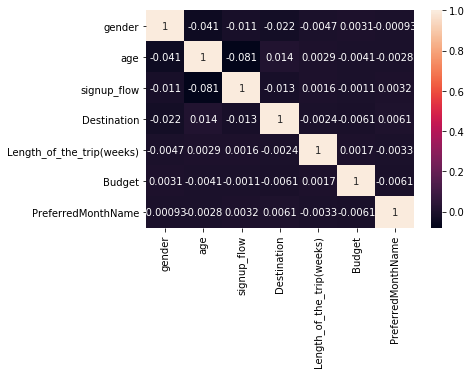

In [23]:
sns.heatmap(travel_train.corr(), annot = True )
plt.rcParams['figure.figsize']=(10,10)
plt.xticks(rotation=90)
plt.yticks(rotation=360)

The parameters in the dataset are not highly correlated.

In [24]:
travel_train.Personality.replace('Adventure', '0', inplace=True)
travel_train.Personality.replace('Digital detox', '1', inplace=True)
travel_train.Personality.replace('Relaxing', '2', inplace=True)
travel_train.Personality.replace('Sight seeing', '3', inplace=True)

travel_train['Personality'] = travel_train['Personality'].astype(int)

## Test data
travel_test.Personality.replace('Adventure', '0', inplace=True)
travel_test.Personality.replace('Digital detox', '1', inplace=True)
travel_test.Personality.replace('Relaxing', '2', inplace=True)
travel_test.Personality.replace('Sight seeing', '3', inplace=True)

travel_test['Personality'] = travel_test['Personality'].astype(int)

In [25]:
travel_train.Types_of_trips.replace('Solo', '0', inplace=True)
travel_train.Types_of_trips.replace('Couple', '1', inplace=True)
travel_train.Types_of_trips.replace('Group', '2', inplace=True)

travel_train['Types_of_trips'] = travel_train['Types_of_trips'].astype(int)

##Test data
travel_test.Types_of_trips.replace('Solo', '0', inplace=True)
travel_test.Types_of_trips.replace('Couple', '1', inplace=True)
travel_test.Types_of_trips.replace('Group', '2', inplace=True)

travel_test['Types_of_trips'] = travel_test['Types_of_trips'].astype(int)

### Univariate Analysis:
-Analyzing one variable at a time.
#### CITATION:
AIRBNB NEW USER BOOKING KAGGLE COMPETITION.
### Gender

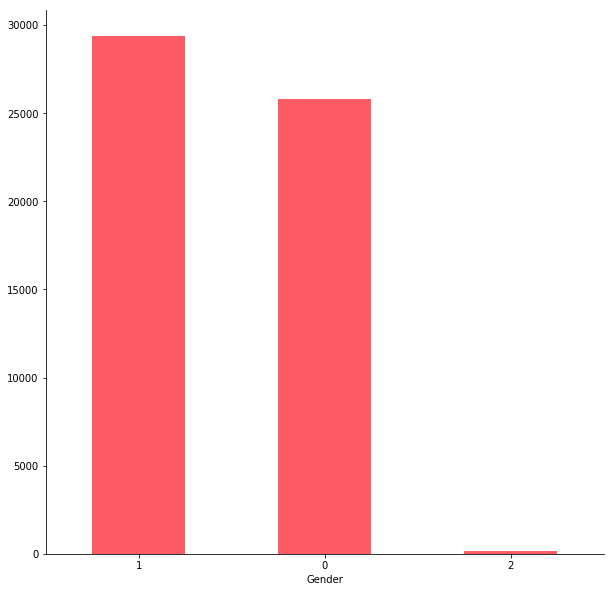

In [26]:
travel_train.gender.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('Gender')
sns.despine()

#### Gender preferences for a particular destination:

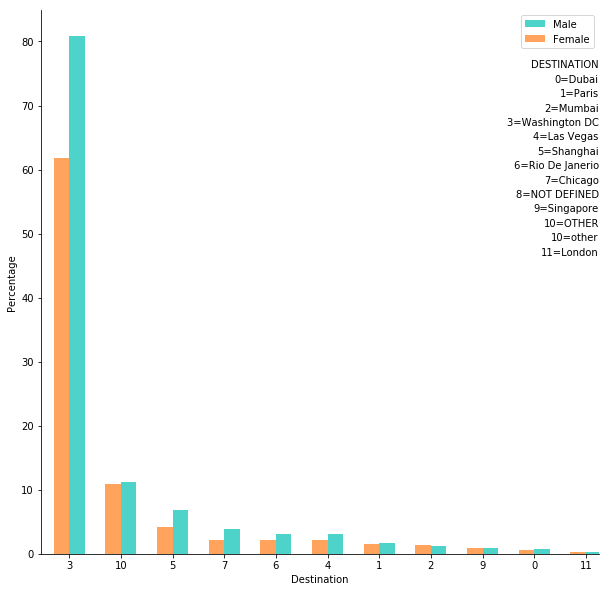

In [27]:
women = sum(travel_train['gender'] == 1)
men = sum(travel_train['gender'] == 0)

female_destinations = travel_train.loc[travel_train['gender'] == 0, 'Destination'].value_counts() / women * 100
male_destinations = travel_train.loc[travel_train['gender'] == 1, 'Destination'].value_counts() / men * 100

# Bar width
width = 0.3

male_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Female', rot=0)

###CITATION-http://www.futurile.net/2016/03/01/text-handling-in-matplotlib/

plt.figtext(0.9,0.8,"DESTINATION",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.78,"0=Dubai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.76,"1=Paris",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.74,"2=Mumbai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.72,"3=Washington DC",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.70,"4=Las Vegas",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.68,"5=Shanghai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.66,"6=Rio De Janerio",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.64,"7=Chicago",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.62,"8=NOT DEFINED",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.60,"9=Singapore",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.58,"10=OTHER",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.56,"10=other",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.54,"11=London",wrap=True,horizontalalignment='right')

plt.legend()
plt.xlabel('Destination')
plt.ylabel('Percentage')

sns.despine()
plt.show()

There are little differences between the 2 main genders, so this plot it's not really usefull except to know the relative destination frequency of the countries. Let's see it clear here:

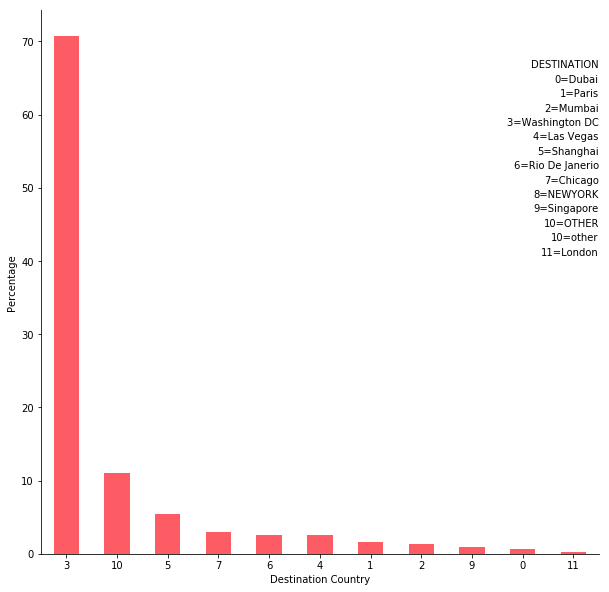

In [28]:
destination_percentage = travel_train.Destination.value_counts() / travel_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#FD5C64', rot=0)

###CITATION-http://www.futurile.net/2016/03/01/text-handling-in-matplotlib/

plt.figtext(0.9,0.8,"DESTINATION",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.78,"0=Dubai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.76,"1=Paris",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.74,"2=Mumbai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.72,"3=Washington DC",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.70,"4=Las Vegas",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.68,"5=Shanghai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.66,"6=Rio De Janerio",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.64,"7=Chicago",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.62,"8=NEWYORK",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.60,"9=Singapore",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.58,"10=OTHER",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.56,"10=other",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.54,"11=London",wrap=True,horizontalalignment='right')


plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

The first thing we can see that if there is a reservation, it's likely to be inside the Washington DC



# Age

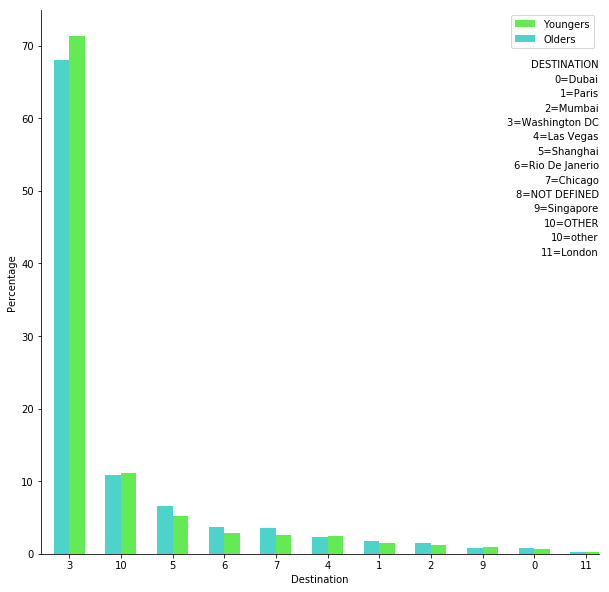

In [29]:
age = 45

younger = sum(travel_train.loc[travel_train['age'] < age, 'Destination'].value_counts())
older = sum(travel_train.loc[travel_train['age'] > age, 'Destination'].value_counts())

younger_destinations = travel_train.loc[travel_train['age'] < age, 'Destination'].value_counts() / younger * 100
older_destinations = travel_train.loc[travel_train['age'] > age, 'Destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='#63EA55', position=0, label='Youngers', rot=0)
older_destinations.plot(kind='bar', width=width, color='#4DD3C9', position=1, label='Olders', rot=0)


###CITATION-http://www.futurile.net/2016/03/01/text-handling-in-matplotlib/

plt.figtext(0.9,0.8,"DESTINATION",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.78,"0=Dubai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.76,"1=Paris",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.74,"2=Mumbai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.72,"3=Washington DC",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.70,"4=Las Vegas",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.68,"5=Shanghai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.66,"6=Rio De Janerio",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.64,"7=Chicago",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.62,"8=NOT DEFINED",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.60,"9=Singapore",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.58,"10=OTHER",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.56,"10=other",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.54,"11=London",wrap=True,horizontalalignment='right')

plt.legend()
plt.xlabel('Destination')
plt.ylabel('Percentage')

sns.despine()
plt.show()

Almost 40% of younger and 35% of older people tend to go to washington DC.

### Types_Of_Trips

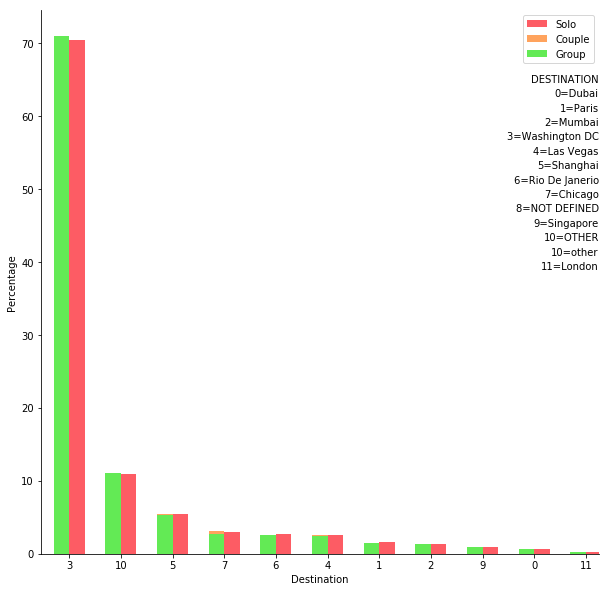

In [30]:
solo = sum(travel_train['Types_of_trips'] == 0)
couple = sum(travel_train['Types_of_trips'] == 1)
group = sum(travel_train['Types_of_trips']==2)

solo_destinations = travel_train.loc[travel_train['Types_of_trips'] == 0, 'Destination'].value_counts() / solo * 100
couple_destinations = travel_train.loc[travel_train['Types_of_trips'] == 1, 'Destination'].value_counts() / couple * 100
group_destinations = travel_train.loc[travel_train['Types_of_trips'] == 2, 'Destination'].value_counts() / group * 100

# Bar width
width = 0.3

solo_destinations.plot(kind='bar', width=width, color='#FD5C64', position=0, label='Solo', rot=0)
couple_destinations.plot(kind='bar', width=width, color='#FFA35D', position=1, label='Couple', rot=0)
group_destinations.plot(kind='bar', width=width, color='#63EA55', position=1, label='Group', rot=0)


###CITATION-http://www.futurile.net/2016/03/01/text-handling-in-matplotlib/

plt.figtext(0.9,0.78,"DESTINATION",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.76,"0=Dubai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.74,"1=Paris",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.72,"2=Mumbai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.70,"3=Washington DC",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.68,"4=Las Vegas",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.66,"5=Shanghai",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.64,"6=Rio De Janerio",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.62,"7=Chicago",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.60,"8=NOT DEFINED",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.58,"9=Singapore",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.56,"10=OTHER",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.54,"10=other",wrap=True,horizontalalignment='right')
plt.figtext(0.9,0.52,"11=London",wrap=True,horizontalalignment='right')

plt.legend()
plt.xlabel('Destination')
plt.ylabel('Percentage')

sns.despine()
plt.show()

Most of the solo and group tend to go to washington DC.

## Feature selection
It is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
Improves Accuracy: Less misleading data means modeling accuracy improves.
Reduces Training Time: Less data means that algorithms train faster.

# one hot encoding before feature engineering

One hot encoding is done to convert the string variables to numerical values.
##### Citation:https://www.kaggle.com/meicher/predicting-first-destination-4-models

In [31]:
#reorder columns to have all features to encode side by side
cols = travel_train.columns.tolist()
print(cols)

['id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'Destination', 'Personality', 'Types_of_trips', 'Length_of_the_trip(weeks)', 'Budget', 'PreferredMonthName']


In [32]:
travel_train.shape

(55349, 21)

In [33]:
cols.insert(0,cols.pop(5))
cols.insert(0,cols.pop(15))
travel_train_modifed = travel_train[cols]

In [34]:
print(cols)

['Destination', 'age', 'id', 'date_account_created', 'timestamp_first_active', 'date_first_booking', 'gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'Personality', 'Types_of_trips', 'Length_of_the_trip(weeks)', 'Budget', 'PreferredMonthName']


In [35]:
#one hot encoding to prepare for modelling
encoding = pd.get_dummies(travel_train_modifed.iloc[:,6:17],columns =travel_train_modifed.iloc[:,6:17].columns, prefix=list(travel_train_modifed.columns[6:17]))
onehot = pd.concat([travel_train_modifed.iloc[:,:6],encoding,travel_train_modifed.iloc[:,17:]],axis=1)

In [36]:
onehot.head()

Destination   age          id date_account_created timestamp_first_active  \
2            3  56.0  4ft3gnwmtx            9/28/2010               2.01e+13   
3           10  42.0  bjjt8pjhuk            12/5/2011               2.01e+13   
6            3  46.0  lsw9q7uk0j             1/2/2010               2.01e+13   
7            3  47.0  0d01nltbrs             1/3/2010               2.01e+13   
8            3  50.0  a1vcnhxeij             1/4/2010               2.01e+13   

  date_first_booking  gender_0  gender_1  gender_2  signup_method_basic  \
2           8/2/2010         0         1         0                    1   
3           9/8/2012         0         1         0                    0   
6           1/5/2010         0         1         0                    1   
7          1/13/2010         0         1         0                    1   
8          7/29/2010         0         1         0                    1   

          ...          first_browser_TheWorld Browser  \
2         ...                                       0   
3         ...                                       0   
6         ...                                       0   
7         ...                                       0   
8         ...                                       0   

   first_browser_Yandex.Browser  Personality_0  Personality_1  Personality_2  \
2                             0              1              0              0   
3                             0              1              0              0   
6                             0              1              0              0   
7                             0              0              0              0   
8                             0              0              0              0   

   Personality_3  Types_of_trips  Length_of_the_trip(weeks)  Budget  \
2              0               2                          2      10   
3              0               2                          4       8   
6              0               2                          1       2   
7              1               2                          1      17   
8              1               1                          2      10   

   PreferredMonthName  
2                  12  
3                   3  
6                   7  
7                   2  
8                  10  

[5 rows x 138 columns]

In [37]:
# Defining the train and test sets for spliting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(onehot,onehot['Destination'],test_size=0.25,random_state=1)

## Feature engineering using XGBoost

We have used XGBoost classifier as it is faster as compared to other classifiers and the model is most widely used for feature selection because of its performance and accurate results.

The Link for XGBOOST installation on windows:
https://www.ibm.com/developerworks/community/blogs/jfp/entry/Installing_XGBoost_For_Anaconda_on_Windows?lang=en



In [38]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.3.0-posix-seh-rt_v5-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [39]:
travel_train.dtypes

id                            object
date_account_created          object
timestamp_first_active        object
date_first_booking            object
gender                         int32
age                          float64
signup_method                 object
signup_flow                    int64
language                      object
affiliate_channel             object
affiliate_provider            object
first_affiliate_tracked       object
signup_app                    object
first_device_type             object
first_browser                 object
Destination                    int32
Personality                    int32
Types_of_trips                 int32
Length_of_the_trip(weeks)      int64
Budget                         int64
PreferredMonthName             int64
dtype: object

### XGBClassifier

#### Citation:https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

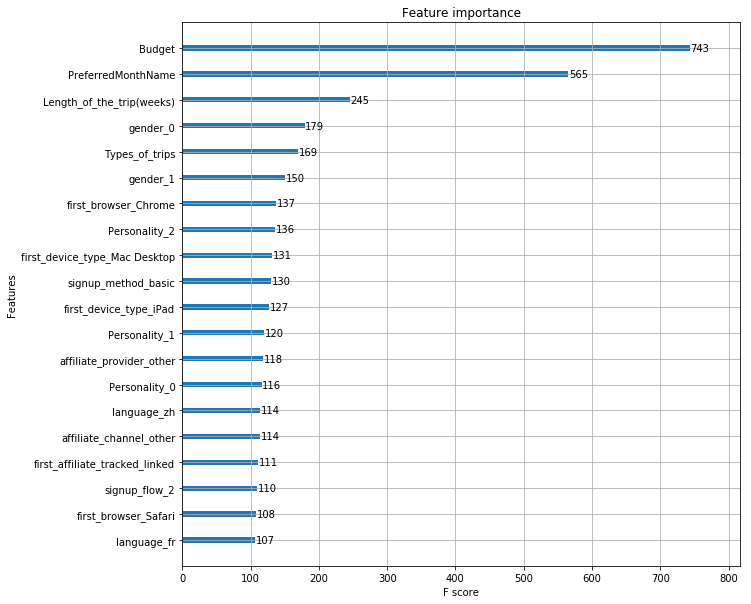

In [40]:
# plot feature importance manually
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(x_train.iloc[:,6:138],y_train)

# plot feature importance
plot_importance(model,max_num_features=20)
plt.show()

In [41]:
#FEATURE SELECTION - check most important features
featureImportance = pd.DataFrame(model.feature_importances_,onehot.columns[6:138],columns=['feature_importance']).sort_values(["feature_importance"],ascending=False)
featureImportance.head(10)

feature_importance
Budget                                   0.112525
PreferredMonthName                       0.085567
Length_of_the_trip(weeks)                0.037104
gender_0                                 0.027109
Types_of_trips                           0.025594
gender_1                                 0.022717
first_browser_Chrome                     0.020748
Personality_2                            0.020597
first_device_type_Mac Desktop            0.019839
signup_method_basic                      0.019688

From the feature engineering we came to know that the feature which has maximum importance is Budget. The next good predicting features are PreferredMonthName and Length_of_the_trip(weeks).

## ExtraTreesClassifier

It provides quick results from already trained model.

#### Citation:https://machinelearningmastery.com/feature-selection-machine-learning-python/

In [42]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(x_train.iloc[:,6:138],y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
#FEATURE SELECTION - check most important features to the random forest algorithm

featureImportance = pd.DataFrame(model.feature_importances_,onehot.columns[6:138],columns=['feature_importance']).sort_values(["feature_importance"],ascending=False)
featureImportance.head(10)

feature_importance
Budget                               0.277399
PreferredMonthName                   0.236559
Length_of_the_trip(weeks)            0.126550
Types_of_trips                       0.087917
Personality_0                        0.016679
Personality_3                        0.016554
Personality_1                        0.016137
Personality_2                        0.014936
signup_method_basic                  0.014295
signup_method_facebook               0.013584

The top 3 features are same in both XGBoost and Extra Trees Classifier.

## Generate a linear model using newly added predictors

#### Citation:https://github.com/nikbearbrown/NEU_COE/blob/master/INFO_7390/Week_3/NBB_Linear_Regression.ipynb

In [44]:
X = travel_train[['gender','age', 'Length_of_the_trip(weeks)','Personality','Types_of_trips','Budget','PreferredMonthName']]
Y = travel_train['Destination']

In [45]:
# Defining the train and test sets for spliting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [46]:
#Fitting multiple linear model to training set
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
predictions = lm.predict(X_test)

In [48]:
print(lm.intercept_)
print(lm.coef_)

4.07492777863
[-0.1166699   0.00268256  0.00324326 -0.01673102  0.00041273 -0.00137228
  0.00515118]


Text(0.5,1,'Expected Predictions Vs Actual Predictions')

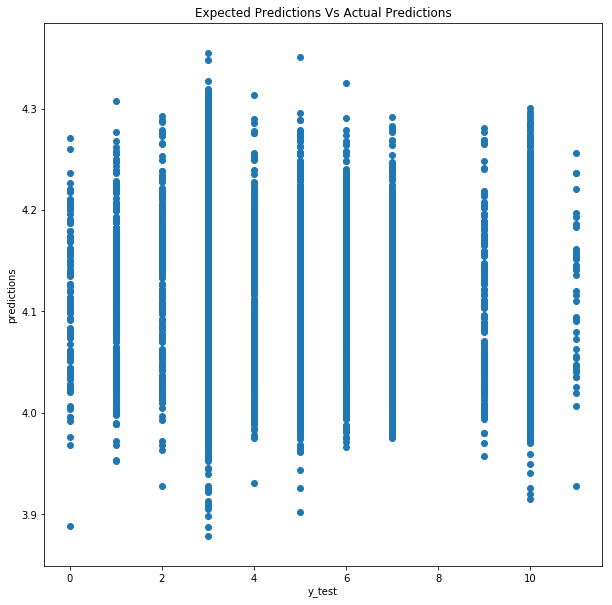

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title("Expected Predictions Vs Actual Predictions")

The dataset is not linearly related as there is no linear realationship between any parameters.

In [50]:
# Calculating the errors for the model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.78591668206
MSE: 5.73949052676
RMSE: 2.39572338277


In [51]:
metrics.explained_variance_score(y_test, predictions)

0.00026142156460839949

In [52]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm.score(X_test.values,y_test.values)

0.0002588767652988988

In [53]:
# Using the OLS Regression Method
import statsmodels.api as sm
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Destination   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Fri, 27 Apr 2018   Prob (F-statistic):               0.00
Time:                        15:31:55   Log-Likelihood:            -1.2954e+05
No. Observations:               55349   AIC:                         2.591e+05
Df Residuals:                   55342   BIC:                         2.592e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
gender                        0.2372      0.021     11.480      0.000       0.197       0.278
age                           0.0461      0.001     60.814      0.000       0.045       0.048
Length_of_the_trip(weeks)     0.2835      0.009     32.729      0.000       0.267       0.300
Personality                   0.1659      0.009     17.926      0.000       0.148       0.184
Types_of_trips                0.2200      0.013     17.334      0.000       0.195       0.245
Budget                        0.0433      0.002     24.926      0.000       0.040       0.047
PreferredMonthName            0.0844      0.003     29.149      0.000       0.079       0.090
==============================================================================
Omnibus:                    12818.266   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24141.610
Skew:                           1.469   Prob(JB):                         0.00
Kurtosis:                       4.356   Cond. No.                         76.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above linear regression performed after adding the new predictors, made a difference in the R-squared value.
Before it is *0.704* and after it is *0.722*. This shows that there is *good* improvement in prediction after adding new predictor.

## Random Forest Classifier

We used this as it helps in classification of data, handling missing values and handles categorical values which are present in our dataset.

#### Citation:https://www.kaggle.com/meicher/predicting-first-destination-4-models

In [54]:
#train test split dataset to measure performance
x_train,x_test,y_train,y_test = train_test_split(onehot,onehot['Destination'],test_size=0.25,random_state=1)

In [55]:
#Random forest classification - instantiate classifier

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [56]:
#fit RF classifier 

clf.fit(x_train.iloc[:,6:138],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
#predict and store predictions in a series 

preds = clf.predict(x_test.iloc[:,6:138])

In [58]:
#add the series to our dataframe

x_test['predicted_country'] = preds

In [59]:
#import packages used for model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,f1_score,recall_score
def score(true,pred):
    return(precision_score(true,pred,average='weighted'),
          recall_score(true,pred,average='weighted'),
          f1_score(true,pred,average='weighted'))

In [60]:
#get overall accuracy score for the RF model

accuracy_score(x_test['Destination'],x_test['predicted_country'])

0.66859372741725687

In [61]:
travel_train.shape

(55349, 21)

In [62]:
#FEATURE SELECTION - check most important features to the random forest algorithm

featureImportance = pd.DataFrame(clf.feature_importances_,onehot.columns[6:138],columns=['feature_importance']).sort_values(["feature_importance"],ascending=False)
featureImportance.head(10)

feature_importance
Budget                                       0.248169
PreferredMonthName                           0.213937
Length_of_the_trip(weeks)                    0.109999
Types_of_trips                               0.082146
Personality_0                                0.018877
Personality_2                                0.018740
Personality_3                                0.018402
Personality_1                                0.017845
first_affiliate_tracked_untracked            0.017735
signup_method_basic                          0.016462

In [63]:
#split the data again using only the top 100 features

x_train,x_test,y_train,y_test = train_test_split(onehot.loc[:,list(featureImportance[:5].index)],
                                                 onehot['Destination'],test_size=0.25,random_state=1)

In [64]:
#Generate Predictions for RF classifier with 100 features

clf = RandomForestClassifier()
clf.fit(x_train,y_train)
preds = clf.predict(x_test)

In [65]:
#New accuracy score - .3% improvement in classification

RF = accuracy_score(y_test,preds)
RF

0.67806041335453104

In [66]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
cross_val_score(clf, x_train, y_train)

array([ 0.65787572,  0.6559948 ,  0.65252277])

From the above Randomforestclassifier, we are able to achieve accuracy about 70%. The feature importance has helped in increase the accuracy by 4%.

### Multinomial Naive Bayes classifier
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes theorem with the naive assumption of independence between every pair of features. Multinomial Naive Bayes classifier is a specific instance of a Naive Bayes classifier which uses a multinomial distribution for each of the features.

#### Citation:https://www.kaggle.com/meicher/predicting-first-destination-4-models, http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [67]:
df=onehot
df.drop(['date_account_created'], axis=1,inplace=True)
df.drop(['date_first_booking'], axis=1,inplace=True)
df.drop(['timestamp_first_active'], axis=1,inplace=True)
df.drop(['id'], axis=1,inplace=True)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(df,df['Destination'],test_size=0.25,random_state=1)

In [69]:
## Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
mnb.fit(x_train,y_train)
preds = mnb.predict(x_test)

In [70]:
MNB = accuracy_score(y_test,preds)
MNB

0.8136291371585489

In [71]:
from sklearn.cross_validation import cross_val_score
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
scores = cross_val_score(mnb, x_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

C:\Users\gujja\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.81299639  0.8131921   0.81266554  0.8136287   0.81262042  0.81185257
  0.81421687  0.81296698  0.81292189  0.81379643]


From the above Multinomial Naive Bayes classifier, we are able to achieve accuracy about 81.3% which is better than accuracy achieved by random forest(70%).

### Multi-layer Perceptron classifier (MLP)
An MLP with a single hidden layer

#### Citation: https://www.kaggle.com/meicher/predicting-first-destination-4-
http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [72]:
x_train,x_test,y_train,y_test = train_test_split(df,df['Destination'],test_size=0.25,random_state=1)

In [73]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
mlp.fit(x_train,y_train)
preds = mlp.predict(x_test)

Iteration 1, loss = 1.00003994
Iteration 2, loss = 0.73196776
Iteration 3, loss = 0.61820093
Iteration 4, loss = 0.50979331
Iteration 5, loss = 0.41594654
Iteration 6, loss = 0.35111394
Iteration 7, loss = 0.30833257
Iteration 8, loss = 0.27549111
Iteration 9, loss = 0.24974298
Iteration 10, loss = 0.22678800
Iteration 11, loss = 0.20556482
Iteration 12, loss = 0.18803684
Iteration 13, loss = 0.17220476
Iteration 14, loss = 0.15737153
Iteration 15, loss = 0.14654126
Iteration 16, loss = 0.13355967
Iteration 17, loss = 0.12404532
Iteration 18, loss = 0.11447166
Iteration 19, loss = 0.10682085
Iteration 20, loss = 0.09878233
Iteration 21, loss = 0.09273527
Iteration 22, loss = 0.08753530
Iteration 23, loss = 0.08132759
Iteration 24, loss = 0.07689155
Iteration 25, loss = 0.07306404
Iteration 26, loss = 0.06871595
Iteration 27, loss = 0.06585007
Iteration 28, loss = 0.27113268
Iteration 29, loss = 0.43991060
Iteration 30, loss = 0.20771834
Training loss did not improve more than tol=0.000

In [74]:
multiLayerPerceptron = accuracy_score(y_test,preds)
multiLayerPerceptron

0.9457291516115045

In [75]:
from sklearn.cross_validation import cross_val_score
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
scores = cross_val_score(mlp, x_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print(scores)
print(scores.mean())    

Iteration 1, loss = 1.01396922
Iteration 2, loss = 0.74581535
Iteration 3, loss = 0.64801822
Iteration 4, loss = 0.56246510
Iteration 5, loss = 0.47371748
Iteration 6, loss = 0.39563611
Iteration 7, loss = 0.34279646
Iteration 8, loss = 0.30482705
Iteration 9, loss = 0.27675910
Iteration 10, loss = 0.25303338
Iteration 11, loss = 0.23182793
Iteration 12, loss = 0.21399677
Iteration 13, loss = 0.19636219
Iteration 14, loss = 0.18111385
Iteration 15, loss = 0.16678751
Iteration 16, loss = 0.15515886
Iteration 17, loss = 0.14432936
Iteration 18, loss = 0.13325529
Iteration 19, loss = 0.12470140
Iteration 20, loss = 0.11600685
Iteration 21, loss = 0.10870579
Iteration 22, loss = 0.10322954
Iteration 23, loss = 0.09584800
Iteration 24, loss = 0.09050071
Iteration 25, loss = 0.08583519
Iteration 26, loss = 0.08059708
Iteration 27, loss = 0.07608226
Iteration 28, loss = 0.07218346
Iteration 29, loss = 0.06915956
Iteration 30, loss = 0.06668347
Iteration 31, loss = 0.06311914
Iteration 32, los

Iteration 1, loss = 1.01978578
Iteration 2, loss = 0.74846879
Iteration 3, loss = 0.64825213
Iteration 4, loss = 0.56621061
Iteration 5, loss = 0.48329614
Iteration 6, loss = 0.40570357
Iteration 7, loss = 0.35054466
Iteration 8, loss = 0.31113996
Iteration 9, loss = 0.28070123
Iteration 10, loss = 0.25736240
Iteration 11, loss = 0.23530443
Iteration 12, loss = 0.21622952
Iteration 13, loss = 0.19887413
Iteration 14, loss = 0.18447620
Iteration 15, loss = 0.16969093
Iteration 16, loss = 0.15719719
Iteration 17, loss = 0.14591725
Iteration 18, loss = 0.13512092
Iteration 19, loss = 0.12506973
Iteration 20, loss = 0.11699250
Iteration 21, loss = 0.10938611
Iteration 22, loss = 0.10254076
Iteration 23, loss = 0.09557080
Iteration 24, loss = 0.09040284
Iteration 25, loss = 0.08548933
Iteration 26, loss = 0.08042336
Iteration 27, loss = 0.07663102
Iteration 28, loss = 0.07271634
Iteration 29, loss = 0.06894337
Iteration 30, loss = 0.06554840
Iteration 31, loss = 0.06300618
Iteration 32, los

The accuracy achieved using this model is 94.5% which is better than results achieved using multinomial naive bayes(81.3%)

### RNN
##### Implementing Recurrent Neural Network to predict destination of new AirBnB users  
If we see every row of dataset as a sentence we can use an RNN is more accurate since we can include information about the sequence of words (every word will be a feature (column) of the row).

Install tensorflow for numerical computation using data flow graphs. Follow this link https://www.tensorflow.org/install/ to install it.

#### Citation:https://www.kaggle.com/lusob04/titanic-rnn

In [76]:
import tensorflow as tf

In [77]:
feature_sets_train = travel_train
feature_sets_test = travel_test
feature_sets_train_tests = pd.concat([feature_sets_train, feature_sets_test])
feature_sets = feature_sets_train
feature_sets.head()

id date_account_created timestamp_first_active date_first_booking  \
2  4ft3gnwmtx            9/28/2010               2.01e+13           8/2/2010   
3  bjjt8pjhuk            12/5/2011               2.01e+13           9/8/2012   
6  lsw9q7uk0j             1/2/2010               2.01e+13           1/5/2010   
7  0d01nltbrs             1/3/2010               2.01e+13          1/13/2010   
8  a1vcnhxeij             1/4/2010               2.01e+13          7/29/2010   

   gender   age signup_method  signup_flow language affiliate_channel  \
2       1  56.0         basic            3       en            direct   
3       1  42.0      facebook            0       en            direct   
6       1  46.0         basic            0       en             other   
7       1  47.0         basic            0       en            direct   
8       1  50.0         basic            0       en             other   

          ...         first_affiliate_tracked signup_app first_device_type  \
2         ...                       untracked        Web   Windows Desktop   
3         ...                       untracked        Web       Mac Desktop   
6         ...                       untracked        Web       Mac Desktop   
7         ...                             omg        Web       Mac Desktop   
8         ...                       untracked        Web       Mac Desktop   

  first_browser Destination  Personality  Types_of_trips  \
2            IE           3            0               2   
3       Firefox          10            0               2   
6        Safari           3            0               2   
7        Safari           3            3               2   
8        Safari           3            3               1   

   Length_of_the_trip(weeks)  Budget  PreferredMonthName  
2                          2      10                  12  
3                          4       8                   3  
6                          1       2                   7  
7                          1      17                   2  
8                          2      10                  10  

[5 rows x 21 columns]

In [78]:
feature_sets_test.head()

id date_account_created timestamp_first_active  gender   age  \
0   5uwns89zht             7/1/2014               2.01e+13       1  35.0   
5   szx28ujmhf             7/1/2014               2.01e+13       1  28.0   
6   guenkfjcbq             7/1/2014               2.01e+13       0  48.0   
11  fyomoivygn             7/1/2014               2.01e+13       1  30.0   
12  iq4kkd5oan             7/1/2014               2.01e+13       0  24.0   

   signup_method  signup_flow language affiliate_channel affiliate_provider  \
0       facebook            0       en            direct             direct   
5          basic            0       en         sem-brand             google   
6          basic           25       en            direct             direct   
11         basic           25       en            direct             direct   
12      facebook            0       en            direct             direct   

   first_affiliate_tracked signup_app first_device_type  first_browser  \
0                untracked      Moweb            iPhone  Mobile Safari   
5                      omg        Web   Windows Desktop         Chrome   
6                untracked        iOS            iPhone      -unknown-   
11               untracked        iOS            iPhone      -unknown-   
12                  linked        Web       Mac Desktop         Safari   

    Personality  Types_of_trips  Budget  Length_of_the_trip(weeks)  \
0             2               0       4                          2   
5             3               2       3                          2   
6             1               0       7                          3   
11            0               2       3                          2   
12            3               2       9                          2   

    PreferredMonthName   Origin city  
0                    8          Nice  
5                    1  Buenos Aires  
6                    6         Tokyo  
11                  10          Rome  
12                  12        Vienna

In [79]:
users = [' '.join(map(str,user[[0, 4, 5, 7, 15, 16, 17, 18, 19, 20]])) for user in feature_sets.values]
users_test = [' '.join(map(str,user[[0, 3, 4, 6, 12, 14, 15, 16, 17, 18]])) for user in feature_sets_test.values]

destination = [user[15] for user in feature_sets.values]
feature_sets = users
feature_sets_test = users_test
labels =  destination
labels

[3,
 10,
 3,
 3,
 3,
 3,
 1,
 5,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 1,
 5,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 3,
 3,
 4,
 3,
 5,
 5,
 3,
 3,
 3,
 7,
 1,
 6,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 10,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 7,
 3,
 9,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 5,
 5,
 7,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 5,
 3,
 3,
 3,
 10,
 4,
 3,
 3,
 3,
 1,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 9,
 3,
 4,
 3,
 3,
 3,
 3,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 10,
 4,
 3,
 3,
 3,
 3,
 10,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 4,
 1,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 2,
 4,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 6,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 5,
 0,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 0,
 5,
 5,
 3,

In [80]:
users = [' '.join(map(str,user[[0,1,2,3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20]])) for user in feature_sets_train_tests.values]

all_text = ' '.join(users)
words = all_text.split()

In [81]:
all_text[:1000]

'10 3.0 2 nan 0 12 direct direct 56.0 9/28/2010 8/2/2010 untracked IE Windows Desktop 1 4ft3gnwmtx en Web 3 basic 8 10.0 4 nan 0 3 direct direct 42.0 12/5/2011 9/8/2012 untracked Firefox Mac Desktop 1 bjjt8pjhuk en Web 0 facebook 2 3.0 1 nan 0 7 other craigslist 46.0 1/2/2010 1/5/2010 untracked Safari Mac Desktop 1 lsw9q7uk0j en Web 0 basic 17 3.0 1 nan 3 2 direct direct 47.0 1/3/2010 1/13/2010 omg Safari Mac Desktop 1 0d01nltbrs en Web 0 basic 10 3.0 2 nan 3 10 other craigslist 50.0 1/4/2010 7/29/2010 untracked Safari Mac Desktop 1 a1vcnhxeij en Web 0 basic 14 3.0 1 nan 0 4 other craigslist 36.0 1/4/2010 1/6/2010 untracked Firefox Mac Desktop 1 yuuqmid2rp en Web 0 basic 14 1.0 1 nan 0 8 direct direct 33.0 1/7/2010 1/8/2010 untracked Chrome Windows Desktop 1 v4d5rl22px en Web 0 basic 12 5.0 1 nan 0 10 direct direct 29.0 1/10/2010 1/10/2010 untracked Chrome Mac Desktop 1 gdka1q5ktd en Web 0 basic 7 3.0 3 nan 0 5 direct direct 30.0 1/10/2010 1/11/2010 linked Chrome Mac Desktop 0 qsibmuz9

In [82]:
words[:10]

['10', '3.0', '2', 'nan', '0', '12', 'direct', 'direct', '56.0', '9/28/2010']

In [83]:
words

['10',
 '3.0',
 '2',
 'nan',
 '0',
 '12',
 'direct',
 'direct',
 '56.0',
 '9/28/2010',
 '8/2/2010',
 'untracked',
 'IE',
 'Windows',
 'Desktop',
 '1',
 '4ft3gnwmtx',
 'en',
 'Web',
 '3',
 'basic',
 '8',
 '10.0',
 '4',
 'nan',
 '0',
 '3',
 'direct',
 'direct',
 '42.0',
 '12/5/2011',
 '9/8/2012',
 'untracked',
 'Firefox',
 'Mac',
 'Desktop',
 '1',
 'bjjt8pjhuk',
 'en',
 'Web',
 '0',
 'facebook',
 '2',
 '3.0',
 '1',
 'nan',
 '0',
 '7',
 'other',
 'craigslist',
 '46.0',
 '1/2/2010',
 '1/5/2010',
 'untracked',
 'Safari',
 'Mac',
 'Desktop',
 '1',
 'lsw9q7uk0j',
 'en',
 'Web',
 '0',
 'basic',
 '17',
 '3.0',
 '1',
 'nan',
 '3',
 '2',
 'direct',
 'direct',
 '47.0',
 '1/3/2010',
 '1/13/2010',
 'omg',
 'Safari',
 'Mac',
 'Desktop',
 '1',
 '0d01nltbrs',
 'en',
 'Web',
 '0',
 'basic',
 '10',
 '3.0',
 '2',
 'nan',
 '3',
 '10',
 'other',
 'craigslist',
 '50.0',
 '1/4/2010',
 '7/29/2010',
 'untracked',
 'Safari',
 'Mac',
 'Desktop',
 '1',
 'a1vcnhxeij',
 'en',
 'Web',
 '0',
 'basic',
 '14',
 '3.0',
 

#### Encoding the words
The embedding lookup requires that we pass in integers to our network. The easiest way to do this is to create dictionaries that map the words in the vocabulary to integers. Then we can convert each of our feature_sets into integers so they can be passed into the network.

Now we're going to encode the words with integers. Build a dictionary that maps words to integers. Later we're going to pad our input vectors with zeros, so make sure the integers start at 1, not 0. Also, we convert the feature_sets to integers and store the feature_sets in a new list called feature_sets_ints

In [84]:
from collections import Counter
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}

feature_sets_ints = []
feature_sets_ints_test = []
print(feature_sets[0])
for each in feature_sets:
    feature_sets_ints.append([vocab_to_int[word] for word in each.split()])

print(feature_sets_test[0])
for each in feature_sets_test:
    feature_sets_ints_test.append([vocab_to_int[word] for word in each.split()]) 

4ft3gnwmtx 1 56.0 3 3 0 2 2 10 12
5uwns89zht 1 35.0 0 iPhone 2 0 4 2 8


In [85]:
feature_set_lens = Counter([len(x) for x in feature_sets_ints])
print("Zero-length feature_sets: {}".format(feature_set_lens[0]))
print("Maximum feature_set length: {}".format(max(feature_set_lens)))

Zero-length feature_sets: 0
Maximum feature_set length: 10


In [86]:
#remove the feature_set with zero length from the feature_sets_ints list.
non_zero_idx = [ii for ii, feature_set in enumerate(feature_sets_ints) if len(feature_set) != 0]
print(len(non_zero_idx))

non_zero_idx_test = [ii for ii, feature_set in enumerate(feature_sets_ints_test) if len(feature_set) != 0]
print(len(non_zero_idx_test))

55349
27548


In [87]:
print(feature_sets_ints[-1])
print(feature_sets_ints_test[-1])

[57586, 4, 71, 1, 8, 9, 4, 8, 25, 8]
[85137, 4, 99, 1, 18, 7, 4, 4, 25, 9, 27]


In [88]:
feature_sets_ints = [feature_sets_ints[ii] for ii in non_zero_idx]
feature_sets_ints_test = [feature_sets_ints_test[ii] for ii in non_zero_idx_test]

labels = np.array([labels[ii] for ii in non_zero_idx])

Now, we create an array features that contains the data we'll pass to the network. The data should come from feature_set_ints, since we want to feed integers to the network.

Each row should be 24 elements long. For feature_sets shorter than 24 words, left pad with 0s. That is, if the feature_set is ['5uwns89zht', 1, 35.0, 'iPhone'], their corresponding integers will be appended at end of the row. For feature_sets longer than 24, use on the first 24 words as the feature vector.

In [89]:
seq_len = 24
features = np.zeros((len(feature_sets_ints), seq_len), dtype=int)
for i, row in enumerate(feature_sets_ints):
    features[i, -len(row):] = np.array(row)[:seq_len]
seq_len = 24
features_test = np.zeros((len(feature_sets_ints_test), seq_len), dtype=int)
for i, row in enumerate(feature_sets_ints_test):
    features_test[i, -len(row):] = np.array(row)[:seq_len]

In [90]:
split_frac = 0.75
split_idx = int(len(features)*split_frac)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(val_x)*0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(41511, 24) 
Validation set: 	(6919, 24) 
Test set: 		(6919, 24)


In [91]:
##Network Architecture
lstm_size = 256
lstm_layers = 1
batch_len = 100
learning_rate = 0.001

In [92]:
n_words = len(vocab_to_int)+1

# Create the graph object
graph = tf.Graph()
# Add nodes to the graph
with graph.as_default():
    placeholder = tf.contrib.layers.xavier_initializer() ## comment to use default network initialization 
    inputs_ = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')
    batch_size = tf.placeholder_with_default(tf.constant(batch_len), shape=[], name='batch_size')

In [93]:
# Size of the embedding vectors (number of units in the embedding layer)
embed_size = 300 

with graph.as_default():
    embedding = tf.Variable(tf.random_uniform((n_words, embed_size), -1, 1))
    embed = tf.nn.embedding_lookup(embedding, inputs_)

In [94]:
with graph.as_default():
    # Your basic LSTM cell
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    
    # Add dropout to the cell
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    
    # Stack up multiple LSTM layers, for deep learning
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    
    # Getting an initial state of all zerosn
    initial_state = cell.zero_state(batch_size, tf.float32)

In [95]:
with graph.as_default():
    outputs, final_state = tf.nn.dynamic_rnn(cell, embed,
                                             initial_state=initial_state)

Activation function - Rectified linear unit (ReLU)  
Cost function - Quadratic cost (mean-square error)  
Gradient Estimation - GradientDescentOptimizer  

In [96]:
with graph.as_default():
    predictions = tf.contrib.layers.fully_connected(outputs[:, -1], 1, activation_fn=tf.nn.relu)
    cost = tf.losses.mean_squared_error(labels_, predictions)
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [97]:
with graph.as_default():
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [98]:
def get_batches(x, y, batch_size=100):
    n_batches = len(x)//batch_size
    x, y = x[:n_batches*batch_size], y[:n_batches*batch_size]
    for ii in range(0, len(x), batch_size):
        yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [99]:
## epochs = 5
epochs = 5

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_len), 1):
            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 0.5,
                    initial_state: state}
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))

            if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_len, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_len):
                    feed = {inputs_: x,
                            labels_: y[:, None],
                            keep_prob: 1,
                            initial_state: val_state}
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/destination_preds.ckpt")

Epoch: 0/5 Iteration: 5 Train loss: 4.827
Epoch: 0/5 Iteration: 10 Train loss: 5.279
Epoch: 0/5 Iteration: 15 Train loss: 5.798
Epoch: 0/5 Iteration: 20 Train loss: 3.910
Epoch: 0/5 Iteration: 25 Train loss: 5.319
Val acc: 0.338
Epoch: 0/5 Iteration: 30 Train loss: 5.912
Epoch: 0/5 Iteration: 35 Train loss: 5.390
Epoch: 0/5 Iteration: 40 Train loss: 6.085
Epoch: 0/5 Iteration: 45 Train loss: 4.619
Epoch: 0/5 Iteration: 50 Train loss: 3.285
Val acc: 0.581
Epoch: 0/5 Iteration: 55 Train loss: 2.062
Epoch: 0/5 Iteration: 60 Train loss: 1.426
Epoch: 0/5 Iteration: 65 Train loss: 1.254
Epoch: 0/5 Iteration: 70 Train loss: 0.901
Epoch: 0/5 Iteration: 75 Train loss: 0.594
Val acc: 0.673
Epoch: 0/5 Iteration: 80 Train loss: 0.486
Epoch: 0/5 Iteration: 85 Train loss: 0.430
Epoch: 0/5 Iteration: 90 Train loss: 1.450
Epoch: 0/5 Iteration: 95 Train loss: 0.300
Epoch: 0/5 Iteration: 100 Train loss: 0.752
Val acc: 0.826
Epoch: 0/5 Iteration: 105 Train loss: 0.574
Epoch: 0/5 Iteration: 110 Train loss

Epoch: 2/5 Iteration: 880 Train loss: 0.184
Epoch: 2/5 Iteration: 885 Train loss: 0.125
Epoch: 2/5 Iteration: 890 Train loss: 0.141
Epoch: 2/5 Iteration: 895 Train loss: 0.142
Epoch: 2/5 Iteration: 900 Train loss: 0.079
Val acc: 0.984
Epoch: 2/5 Iteration: 905 Train loss: 0.158
Epoch: 2/5 Iteration: 910 Train loss: 0.120
Epoch: 2/5 Iteration: 915 Train loss: 0.099
Epoch: 2/5 Iteration: 920 Train loss: 0.129
Epoch: 2/5 Iteration: 925 Train loss: 0.198
Val acc: 0.994
Epoch: 2/5 Iteration: 930 Train loss: 0.127
Epoch: 2/5 Iteration: 935 Train loss: 0.115
Epoch: 2/5 Iteration: 940 Train loss: 0.120
Epoch: 2/5 Iteration: 945 Train loss: 0.150
Epoch: 2/5 Iteration: 950 Train loss: 0.079
Val acc: 0.997
Epoch: 2/5 Iteration: 955 Train loss: 0.166
Epoch: 2/5 Iteration: 960 Train loss: 0.096
Epoch: 2/5 Iteration: 965 Train loss: 0.183
Epoch: 2/5 Iteration: 970 Train loss: 0.130
Epoch: 2/5 Iteration: 975 Train loss: 0.112
Val acc: 0.995
Epoch: 2/5 Iteration: 980 Train loss: 0.173
Epoch: 2/5 Itera

Epoch: 4/5 Iteration: 1740 Train loss: 0.091
Epoch: 4/5 Iteration: 1745 Train loss: 0.103
Epoch: 4/5 Iteration: 1750 Train loss: 0.096
Val acc: 0.997
Epoch: 4/5 Iteration: 1755 Train loss: 0.078
Epoch: 4/5 Iteration: 1760 Train loss: 0.072
Epoch: 4/5 Iteration: 1765 Train loss: 0.095
Epoch: 4/5 Iteration: 1770 Train loss: 0.096
Epoch: 4/5 Iteration: 1775 Train loss: 0.132
Val acc: 0.999
Epoch: 4/5 Iteration: 1780 Train loss: 0.066
Epoch: 4/5 Iteration: 1785 Train loss: 0.197
Epoch: 4/5 Iteration: 1790 Train loss: 0.108
Epoch: 4/5 Iteration: 1795 Train loss: 0.121
Epoch: 4/5 Iteration: 1800 Train loss: 0.122
Val acc: 1.000
Epoch: 4/5 Iteration: 1805 Train loss: 0.120
Epoch: 4/5 Iteration: 1810 Train loss: 0.145
Epoch: 4/5 Iteration: 1815 Train loss: 0.079
Epoch: 4/5 Iteration: 1820 Train loss: 0.057
Epoch: 4/5 Iteration: 1825 Train loss: 0.079
Val acc: 1.000
Epoch: 4/5 Iteration: 1830 Train loss: 0.132
Epoch: 4/5 Iteration: 1835 Train loss: 0.124
Epoch: 4/5 Iteration: 1840 Train loss: 0

In [100]:
test_acc = []
with tf.Session(graph=graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    test_state = sess.run(cell.zero_state(batch_len, tf.float32))
    for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_len), 1):
        feed = {inputs_: x,
                labels_: y[:, None],
                keep_prob: 1,
                initial_state: test_state}
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc) 
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))

INFO:tensorflow:Restoring parameters from checkpoints\destination_preds.ckpt
Test accuracy: 0.999


### SVM
In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyperplane that differentiate the two classes very well

#### Citation: https://www.kaggle.com/nirajvermafcb/support-vector-machine-detail-analysis?scriptVersionId=940166
http://scikit-learn.org/stable/modules/svm.html

In [101]:
#train test split dataset to measure performance. 
x_train,x_test,y_train,y_test = train_test_split(df,df['Destination'],test_size=0.25,random_state=1)

### Training and fitting SVM 

In [102]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(kernel='rbf', C=3, gamma=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.949631449631


The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example.

For a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

In [103]:
svc=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.987642722937


### Performing K-fold cross validation with different kernels

#### CV on rbf kernel

In [104]:
from sklearn.cross_validation import cross_val_score
svc=SVC(kernel='rbf')
scores = cross_val_score(svc, x_train, y_train, cv=10, scoring='accuracy') #cv is cross validation
print(scores)

[ 0.98796631  0.98892634  0.98362629  0.98458945  0.98747592  0.98385931
  0.98626506  0.98602073  0.98601736  0.98769899]


We can see above how the accuracy score is different everytime.This shows that accuracy score depends upon how the datasets got split.

When K-fold cross validation is done we can see different score in each iteration.This happens because when we use train_test_split method,the dataset get split in random manner into testing and training dataset.Thus it depends on how the dataset got split and which samples are training set and which samples are in testing set.

With K-fold cross validation we can see that the dataset got split into 10 equal parts thus covering all the data into training as well into testing set.This is the reason we got 10 different accuracy score.